<a href="https://colab.research.google.com/github/sonjoy1s/kaggle_project/blob/main/Japan_Top_50_Universities_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("/content/japan_universities_2026.csv")
df.head()

,University_Name,National_Rank,Founded_Year,Institution_Type,Region,Research_Impact_Score,Intl_Student_Ratio,Employment_Rate
0,University of Tokyo,1,1877,National,Tokyo,98.5,14.2,94.5
1,Kyoto University,2,1897,National,Kyoto,97.2,12.5,93.8
2,Tohoku University,3,1907,National,Miyagi,94.8,11.8,95.2
3,Institute of Science Tokyo,4,2024,National,Tokyo,95.1,12.8,97.5
4,Osaka University,5,1931,National,Osaka,92.1,10.9,94.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   University_Name        52 non-null     object 
 1   National_Rank          52 non-null     int64  
 2   Founded_Year           52 non-null     int64  
 3   Institution_Type       52 non-null     object 
 4   Region                 52 non-null     object 
 5   Research_Impact_Score  52 non-null     float64
 6   Intl_Student_Ratio     52 non-null     float64
 7   Employment_Rate        52 non-null     float64
dtypes: float64(3), int64(2), object(3)
memory usage: 3.4+ KB


In [5]:
df.isna().sum()

,0
University_Name,0
National_Rank,0
Founded_Year,0
Institution_Type,0
Region,0
Research_Impact_Score,0
Intl_Student_Ratio,0
Employment_Rate,0


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
National_Rank,52.0,26.500000,15.154757,1.0,13.750,26.50,39.250,52.0
Founded_Year,52.0,1926.903846,39.833112,1858.0,1888.000,1940.50,1949.000,2024.0
Research_Impact_Score,52.0,69.357692,14.233313,48.8,57.325,67.15,79.825,98.5
Intl_Student_Ratio,52.0,10.276923,7.532924,3.9,5.425,8.15,12.175,48.5
Employment_Rate,52.0,92.223077,4.161618,84.2,88.775,93.30,95.250,98.2


In [8]:
numerical = ['Founded_Year','Research_Impact_Score','Intl_Student_Ratio',
             'Employment_Rate']


catagorical = ['University_Name','Institution_Type','Region']

target = "National_Rank"

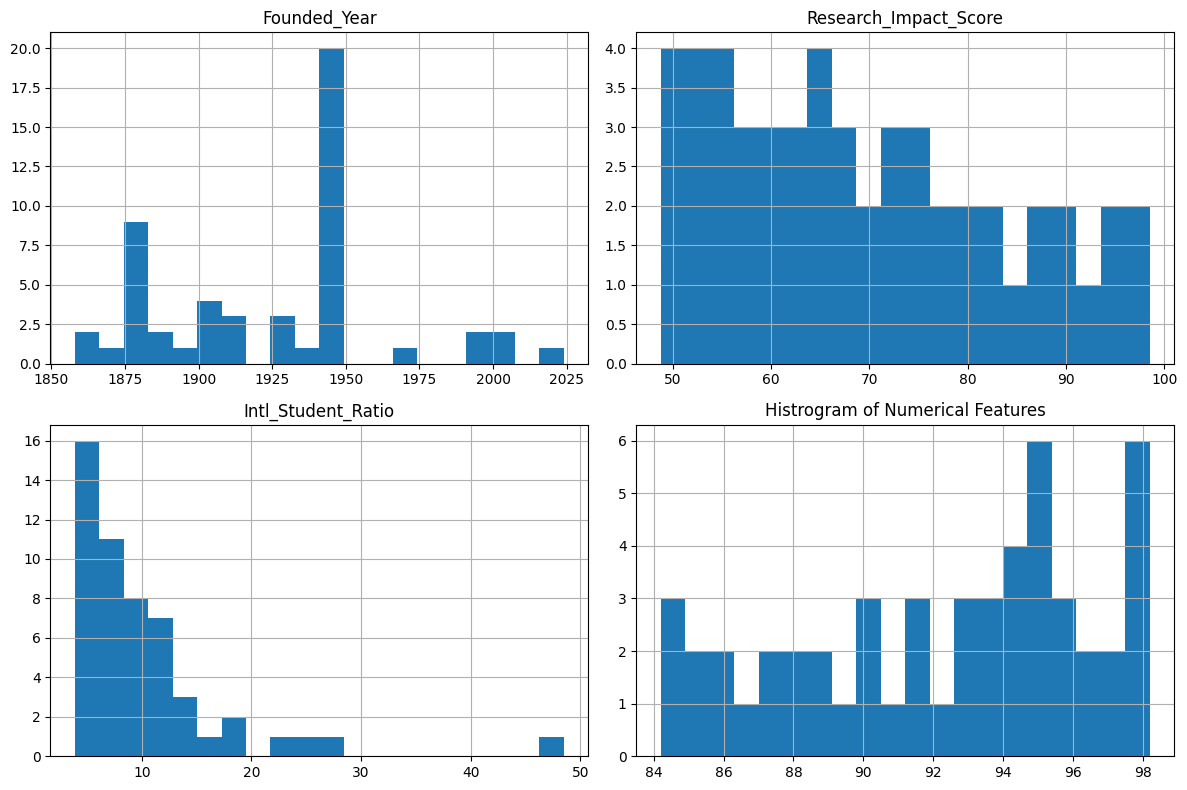

In [10]:
df[numerical].hist(bins=20,figsize=(12,8))
plt.title("Histrogram of Numerical Features")
plt.tight_layout()
plt.show()

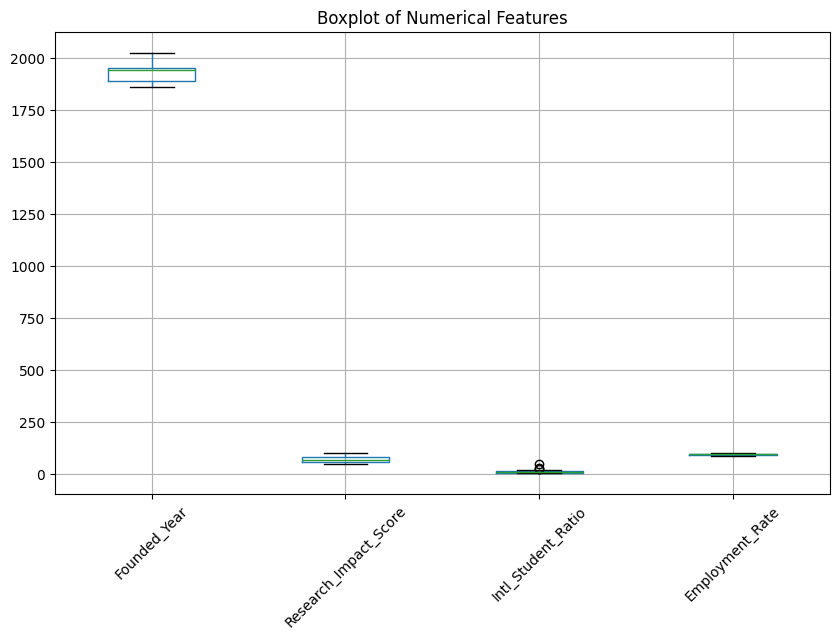

In [11]:
plt.figure(figsize=(10,6))
df[numerical].boxplot()
plt.title("Boxplot of Numerical Features")
plt.xticks(rotation=45)
plt.show()